In [1]:
import random


def random_around_zero(r):
    """
    Return a random float in the range [-r, r]
    """
    width = 2 * r
    return random.random() * width - r

In [2]:
def random_throw(r):
    """
    Return a random float in the range [-r, r]
    """
    x = random_around_zero(r)
    y = random_around_zero(r)
    return x, y

In [3]:
def in_circle(x, y, r):
    """
    Return True if (x, y) is in a circle with radius r
    centered at 0. Otherwise False.
    """
    distance_from_center = (x * x + y * y) ** 0.5
    return distance_from_center <= r

In [7]:
def number_in_circle(n, r=0.5):
    """
    Test n_total random points (x, y) in a square with
    sides 2r and return the number of points that are
    inside a circle of radius r.
    """
    count = 0
    for _ in range(n):
        x, y = random_throw(r)
        if in_circle(x, y, r):
            count += 1
    return count

In [8]:
def main():
    for i in range(9):
        n_total = 10 ** i
        n_circle = number_in_circle(n_total)
        pi_approx = 4 * n_circle / n_total
        print( '1X10^'+ str(i) + ':', pi_approx)

In [9]:
main()

1X10^0: 4.0
1X10^1: 3.2
1X10^2: 3.28
1X10^3: 3.152
1X10^4: 3.1244
1X10^5: 3.13476
1X10^6: 3.142076
1X10^7: 3.141248
1X10^8: 3.14143492


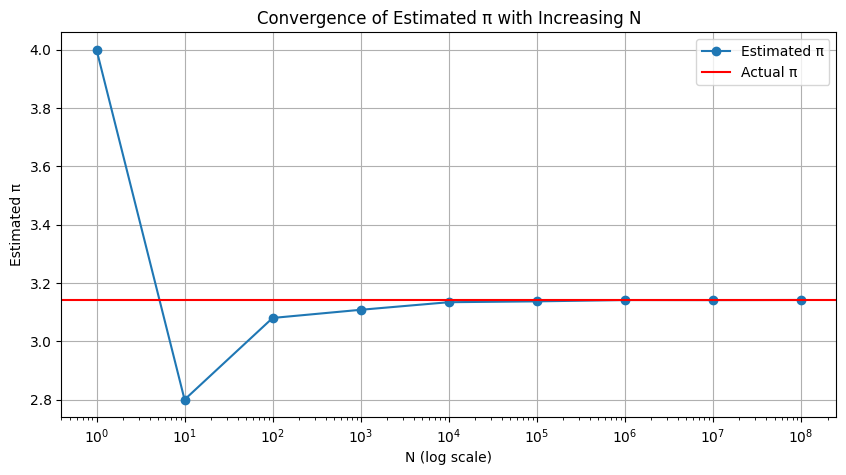

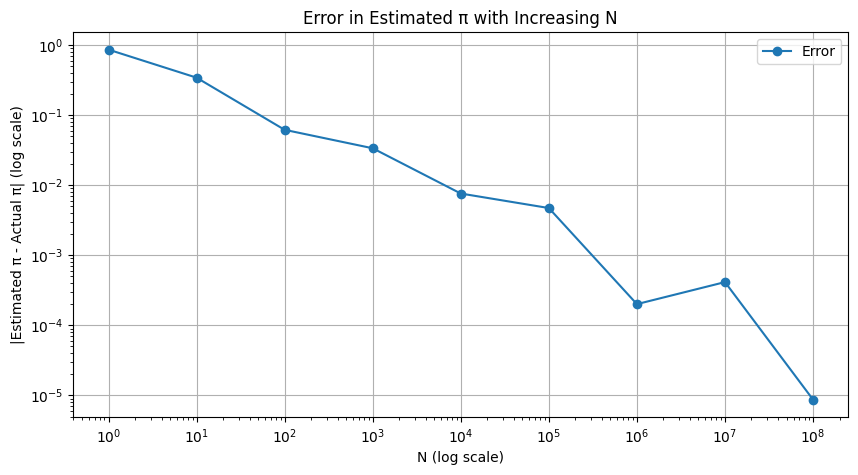

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Actual value of π
pi_actual = np.pi

# Simulation results
N_values = [10**i for i in range(9)]
pi_estimates = []
errors = []

for N in N_values:
    n_circle = number_in_circle(N)
    pi_estimate = 4 * n_circle / N
    pi_estimates.append(pi_estimate)
    errors.append(abs(pi_estimate - pi_actual))

# Plotting convergence behavior
plt.figure(figsize=(10, 5))
plt.plot(N_values, pi_estimates, marker='o', label='Estimated π')
plt.axhline(y=pi_actual, color='r', linestyle='-', label='Actual π')
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Estimated π')
plt.title('Convergence of Estimated π with Increasing N')
plt.legend()
plt.grid()
plt.show()

# Plotting error behavior
plt.figure(figsize=(10, 5))
plt.plot(N_values, errors, marker='o', label='Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('|Estimated π - Actual π| (log scale)')
plt.title('Error in Estimated π with Increasing N')
plt.legend()
plt.grid()
plt.show()